In [15]:
import numpy as np
from numpy import load, arange, linspace
import matplotlib.pyplot as plt
from utils import box_plot, num_grad_hug_hop, num_grad_thug_hop

In [16]:
folder = "dumper/"

# HUG
THETA_ESS_HUG = load(folder + "THETA_ESS_HUG.npy")
U_ESS_HUG     = load(folder + "U_ESS_HUG.npy")
ESS_HUG       = load(folder + "ESS_JOINT_HUG.npy")
A_HUG         = load(folder + "A_HUG.npy")
RMSE_HUG      = load(folder + "RMSE_HUG.npy")
EJSD_HUG      = load(folder + "EJSD_HUG.npy")
G_EJSD_HUG    = load(folder + "G_EJSD_HUG.npy")
T_EJSD_HUG    = load(folder + "T_EJSD_HUG.npy")
A_HOP_HUG     = load(folder + "A_HOP_HUG.npy")
N_UNIQUE_HUG  = load(folder + "N_UNIQUE_HUG.npy")
THETA_AC_HUG  = load(folder + "THETA_AC_HUG.npy")
U_AC_HUG      = load(folder + "U_AC_HUG.npy")

# HUG AR
THETA_ESS_AR = load(folder + "THETA_ESS_AR.npy")
U_ESS_AR     = load(folder + "U_ESS_AR.npy")
ESS_AR       = load(folder + "ESS_JOINT_AR.npy")
A_AR         = load(folder + "A_AR.npy")
RMSE_AR      = load(folder + "RMSE_AR.npy")
EJSD_AR      = load(folder + "EJSD_AR.npy")
G_EJSD_AR    = load(folder + "G_EJSD_AR.npy")
T_EJSD_AR    = load(folder + "T_EJSD_AR.npy")
A_HOP_AR     = load(folder + "A_HOP_AR.npy")
N_UNIQUE_AR  = load(folder + "N_UNIQUE_AR.npy")
THETA_AC_AR  = load(folder + "THETA_AC_AR.npy")
U_AC_AR      = load(folder + "U_AC_AR.npy")

# COMMON
EPSILONS       = load(folder + "EPSILONS.npy")
TS             = load(folder + "TS.npy")
time           = load(folder + "TIME.npy")
RHO            = load(folder + "RHO.npy")
N              = load(folder + "N.npy")
N_RUNS         = load(folder + "N_RUNS.npy")

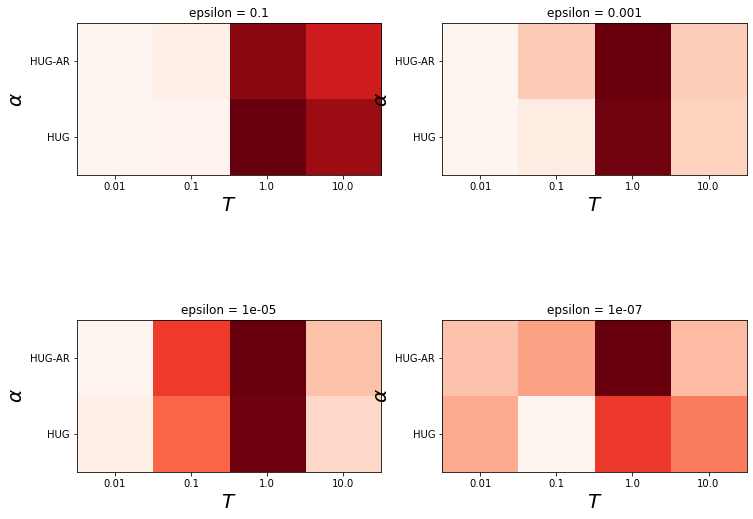

In [17]:
# Get the ESS data. Do not use T=0.01
data_list = [
    np.hstack((THETA_ESS_HUG[:, i, :].mean(axis=0).reshape(-1, 1), THETA_ESS_AR[:, i, :].mean(axis=0).reshape(-1, 1))) for i in range(len(EPSILONS))
]
string_ts = [str(T) for T in TS]
# Normalize data
data_list = [data / np.max(data) for data in data_list]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
for i in range(len(EPSILONS)):
    ax[i //2, i % 2].imshow(data_list[i].T, cmap='Reds')
    # draw gridlines
    #ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax[i //2, i % 2].set_yticks(np.arange(0.0, 1.5, 1));
    ax[i //2, i % 2].set_xticks(np.arange(0.0, len(string_ts), 1));
    ax[i //2, i % 2].set_yticklabels(['HUG', 'HUG-AR'])
    ax[i //2, i % 2].set_xticklabels(string_ts)
    ax[i //2, i % 2].set_ylabel('$\\alpha$', fontsize=20)
    ax[i //2, i % 2].set_xlabel('$T$', fontsize=20)
    ax[i //2, i % 2].set_title("epsilon = {}".format(EPSILONS[i]))
    ax[i //2, i % 2].set_ylim(-0.5, 1.5)
    ax[i //2, i % 2].set_xlim(len(string_ts)-0.5, -0.5)
plt.show()